In [613]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [614]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [616]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [617]:
df.shape

(10000, 6)

In [618]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [619]:
df.duplicated().sum()

127

In [620]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [621]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [622]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].apply(lambda x: 1 if x == "Yes" else 0)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


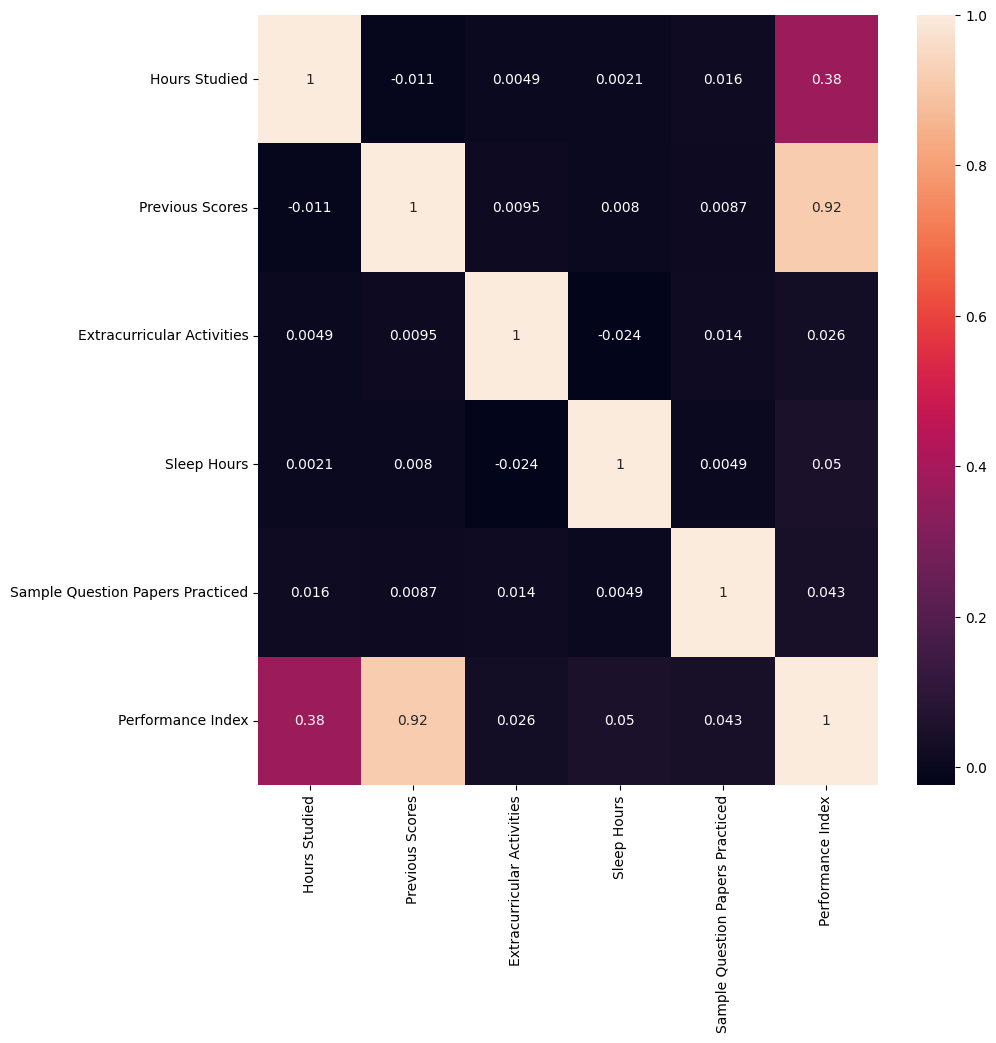

In [623]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

plt.show()

In [624]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [625]:
x = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']

In [626]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=123)

<Axes: >

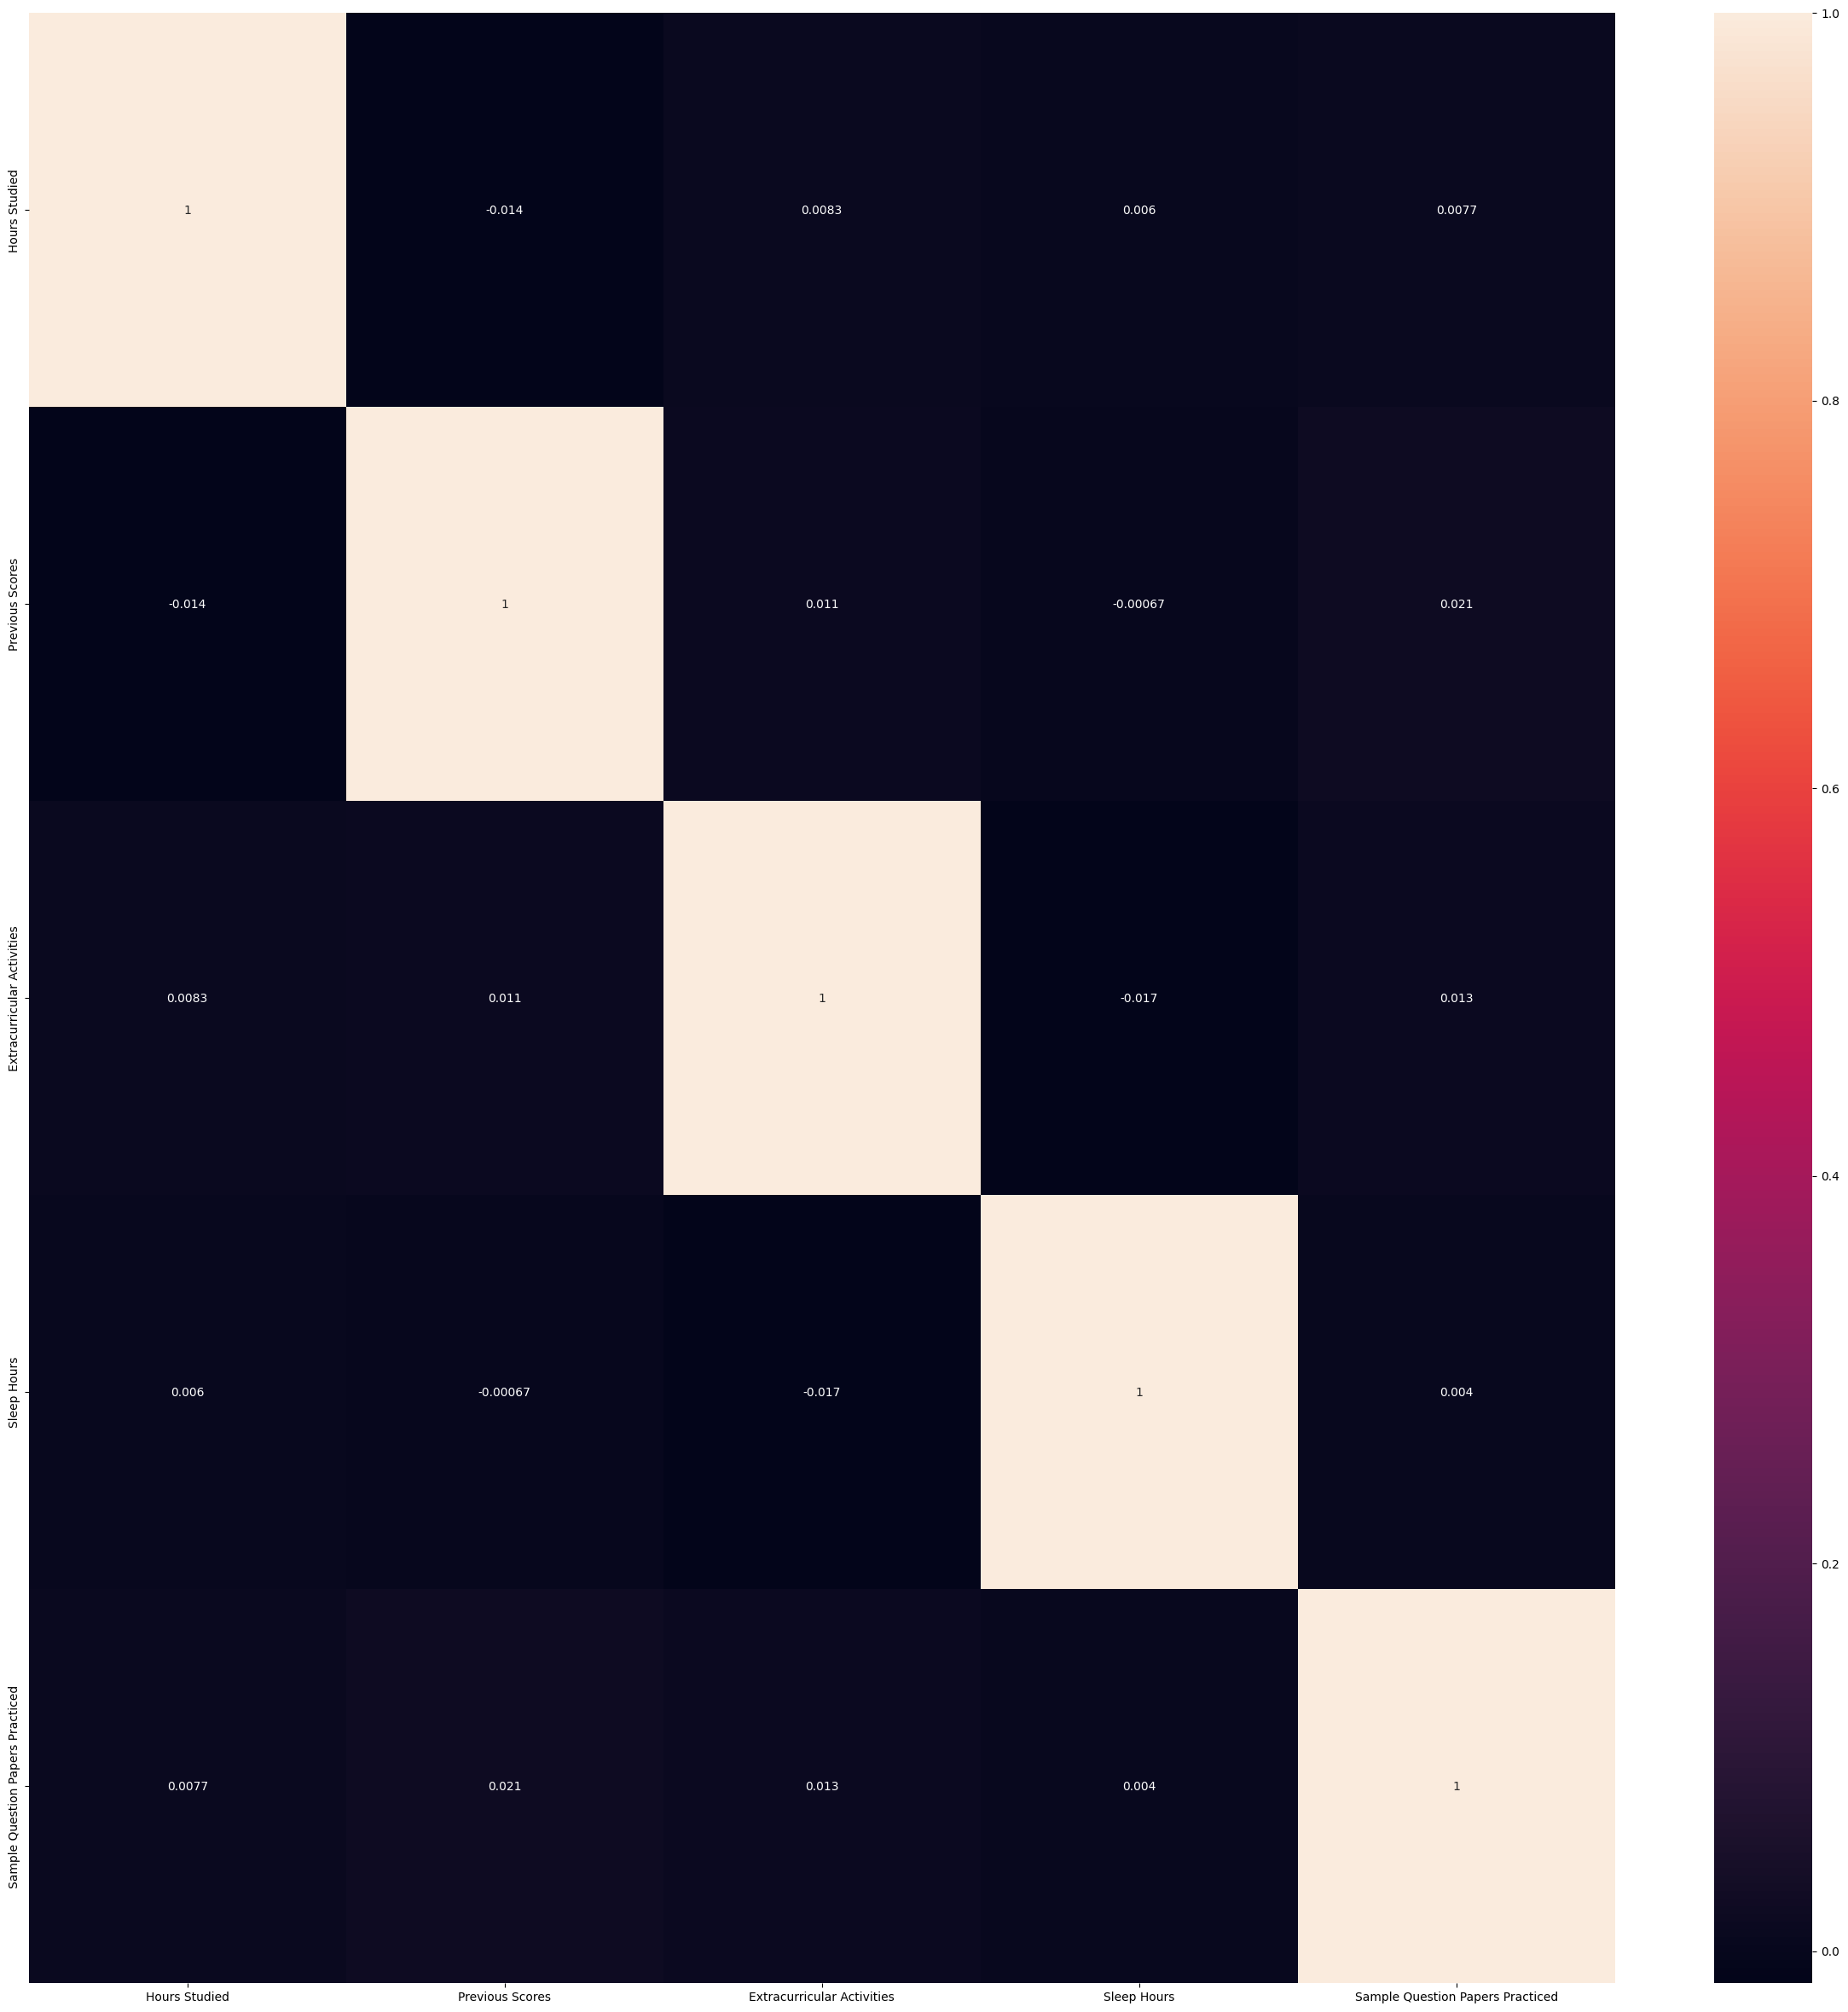

In [627]:

plt.figure(figsize = (30,30))
sns.heatmap(x_train.corr(),annot = True)

<Axes: >

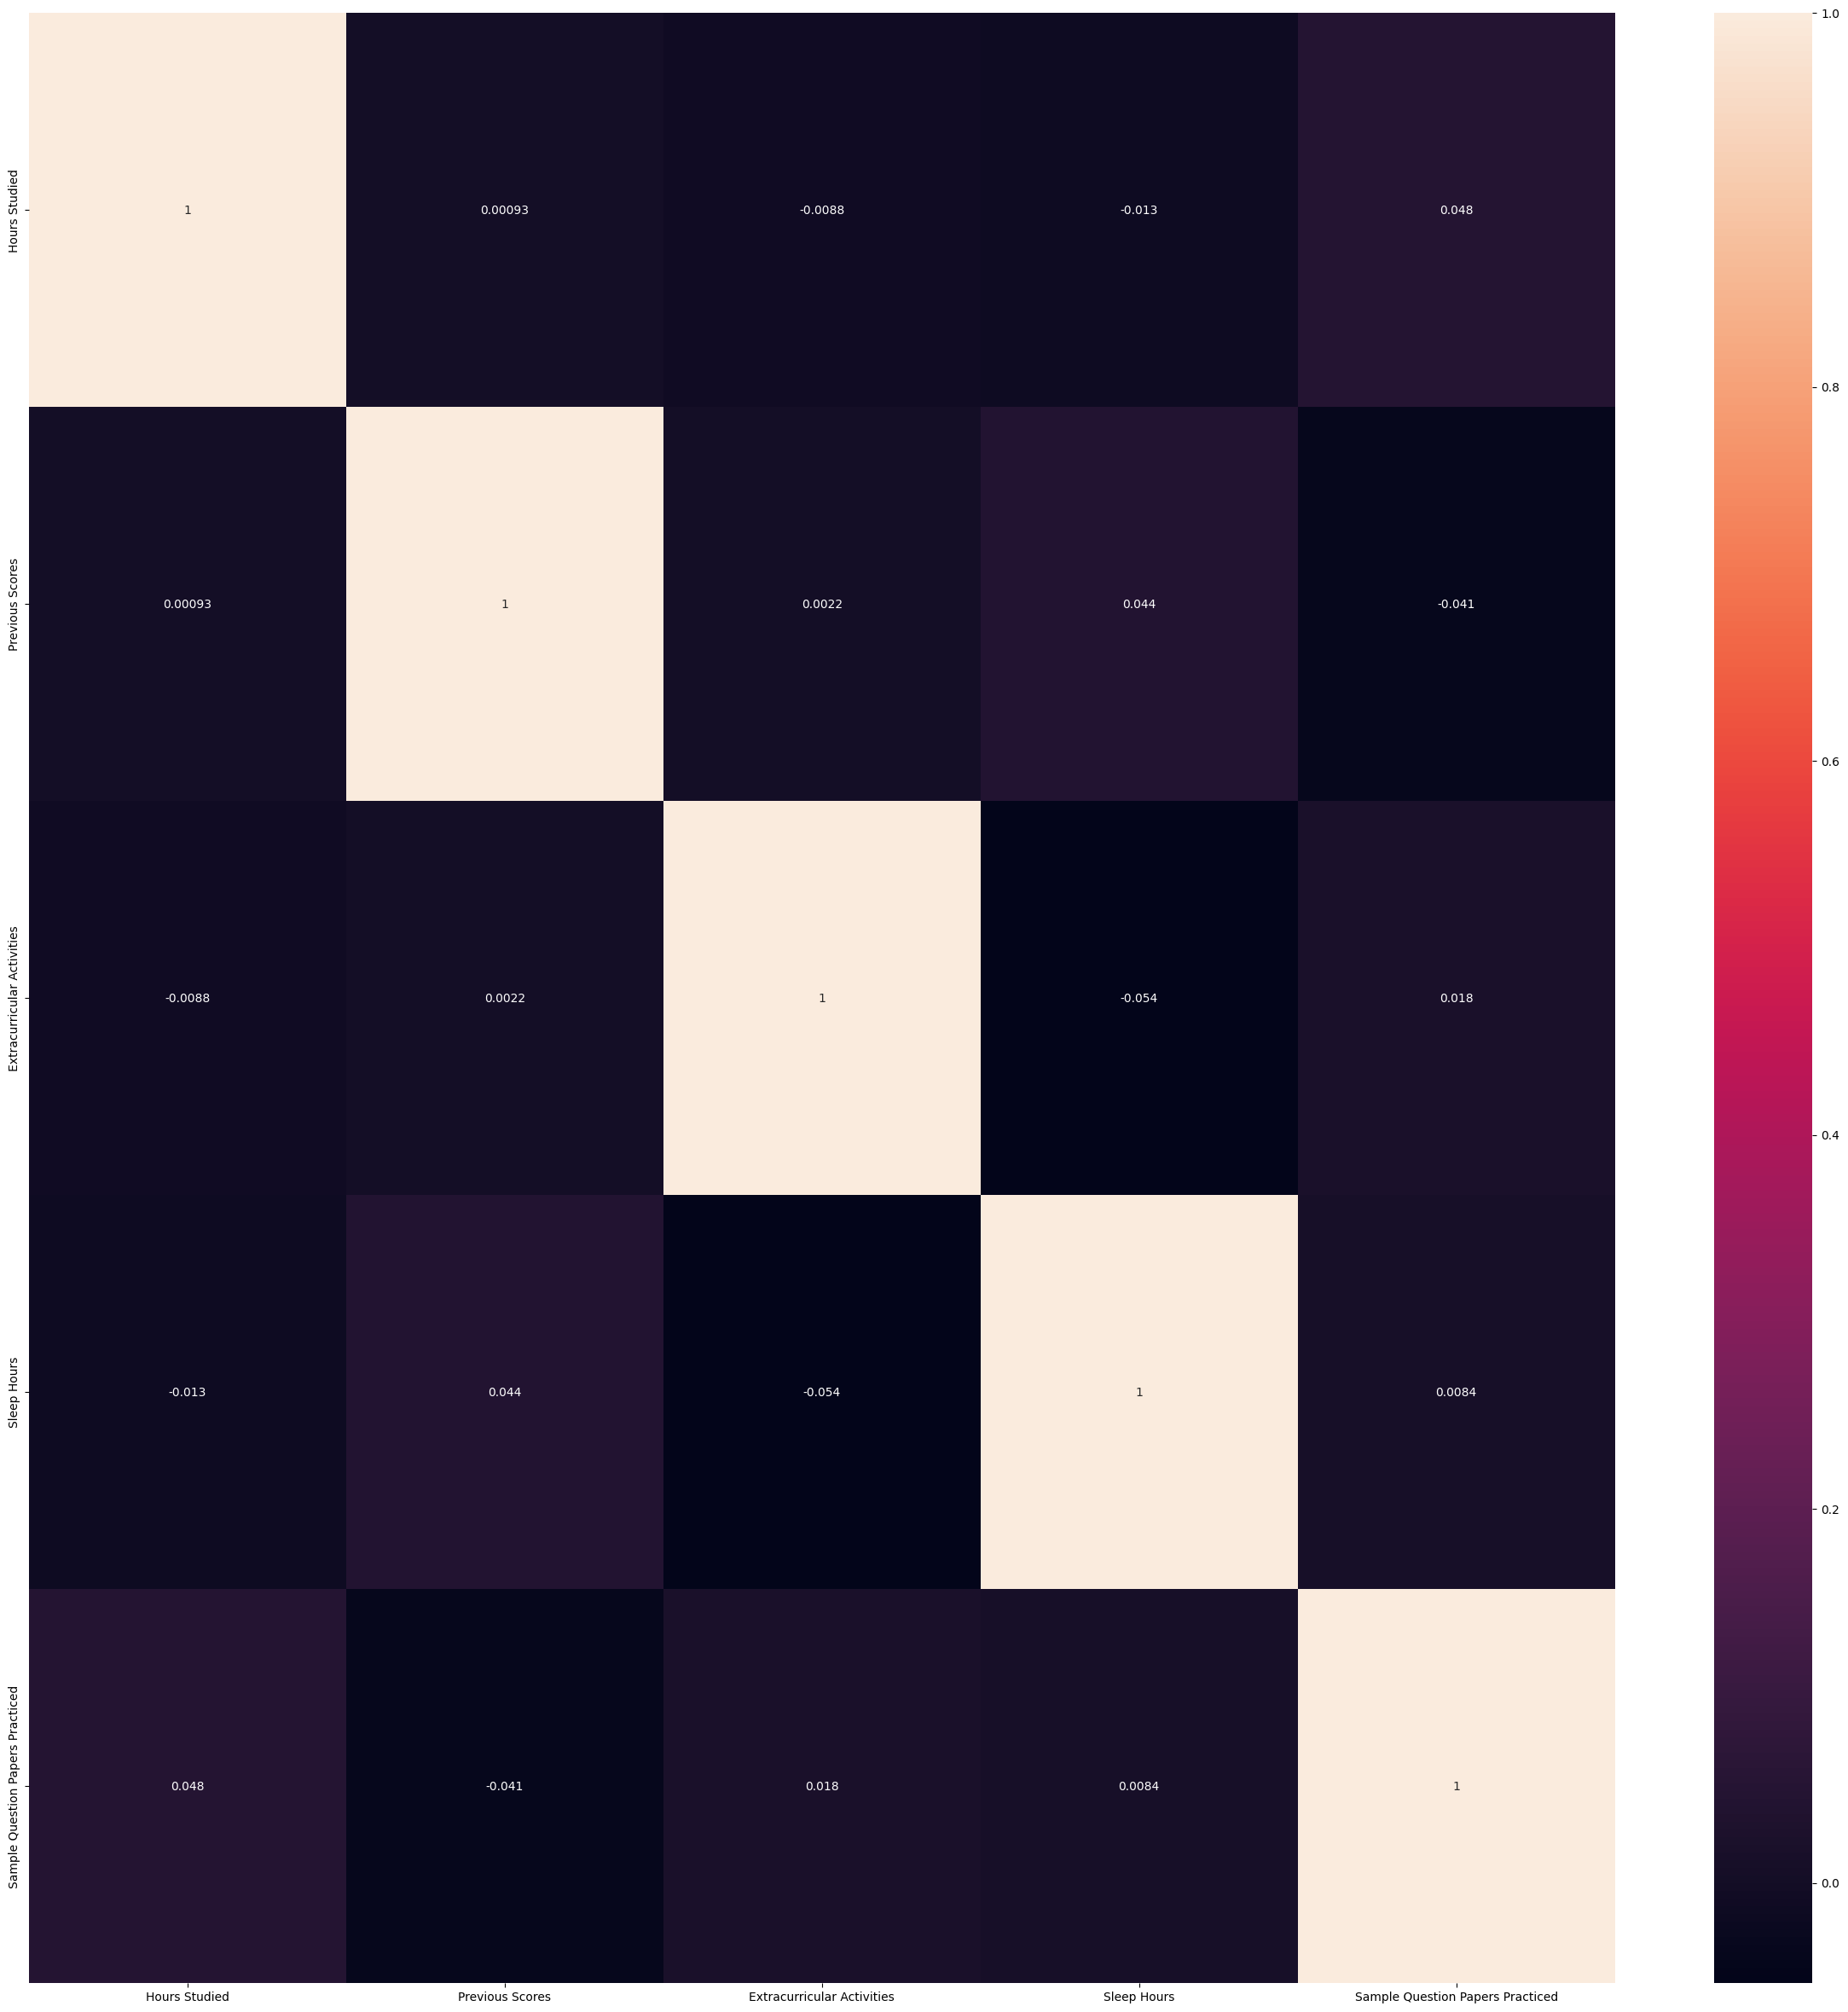

In [628]:
plt.figure(figsize = (30,30))
sns.heatmap(x_test.corr(),annot = True)

Text(0.5, 0, 'Sample Question Papers Practiced')

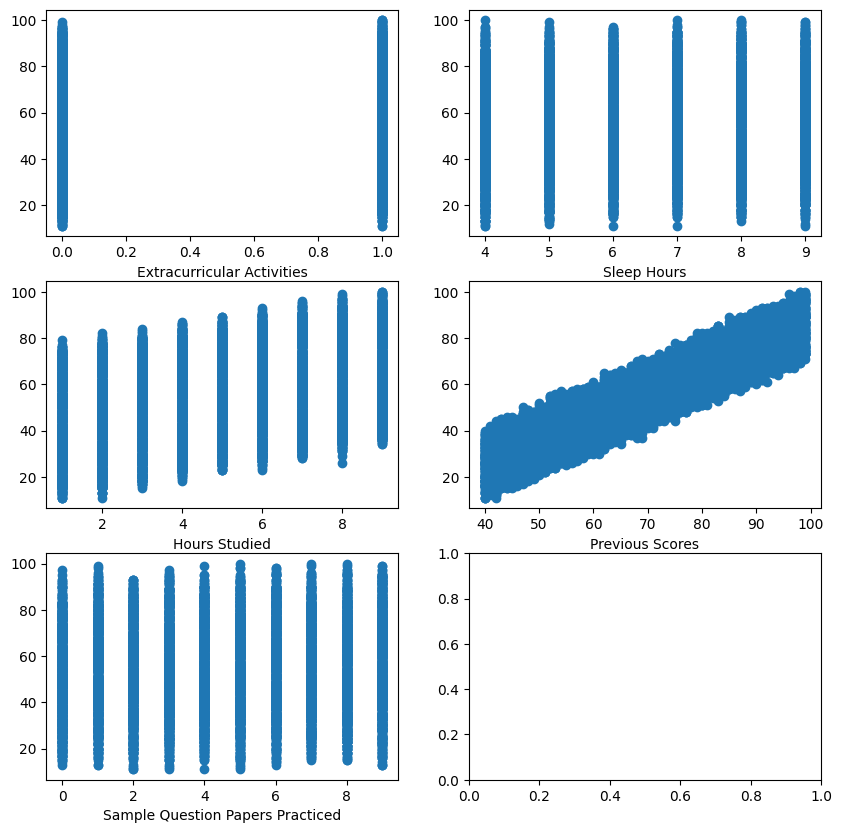

In [629]:
#Plots to show the linear relashionship between radius_mean and redundannt features
fig,ax = plt.subplots(3,2,figsize = (10,10))

ax[0,0].scatter(x_train['Extracurricular Activities'],y_train)
ax[0,0].set_xlabel('Extracurricular Activities')

ax[0,1].scatter(x_train['Sleep Hours'],y_train)
ax[0,1].set_xlabel('Sleep Hours')

ax[1,0].scatter(x_train['Hours Studied'],y_train)
ax[1,0].set_xlabel('Hours Studied')

ax[1,1].scatter(x_train['Previous Scores'],y_train)
ax[1,1].set_xlabel('Previous Scores')

ax[2,0].scatter(x_train['Sample Question Papers Practiced'],y_train)
ax[2,0].set_xlabel('Sample Question Papers Practiced')

<Axes: >

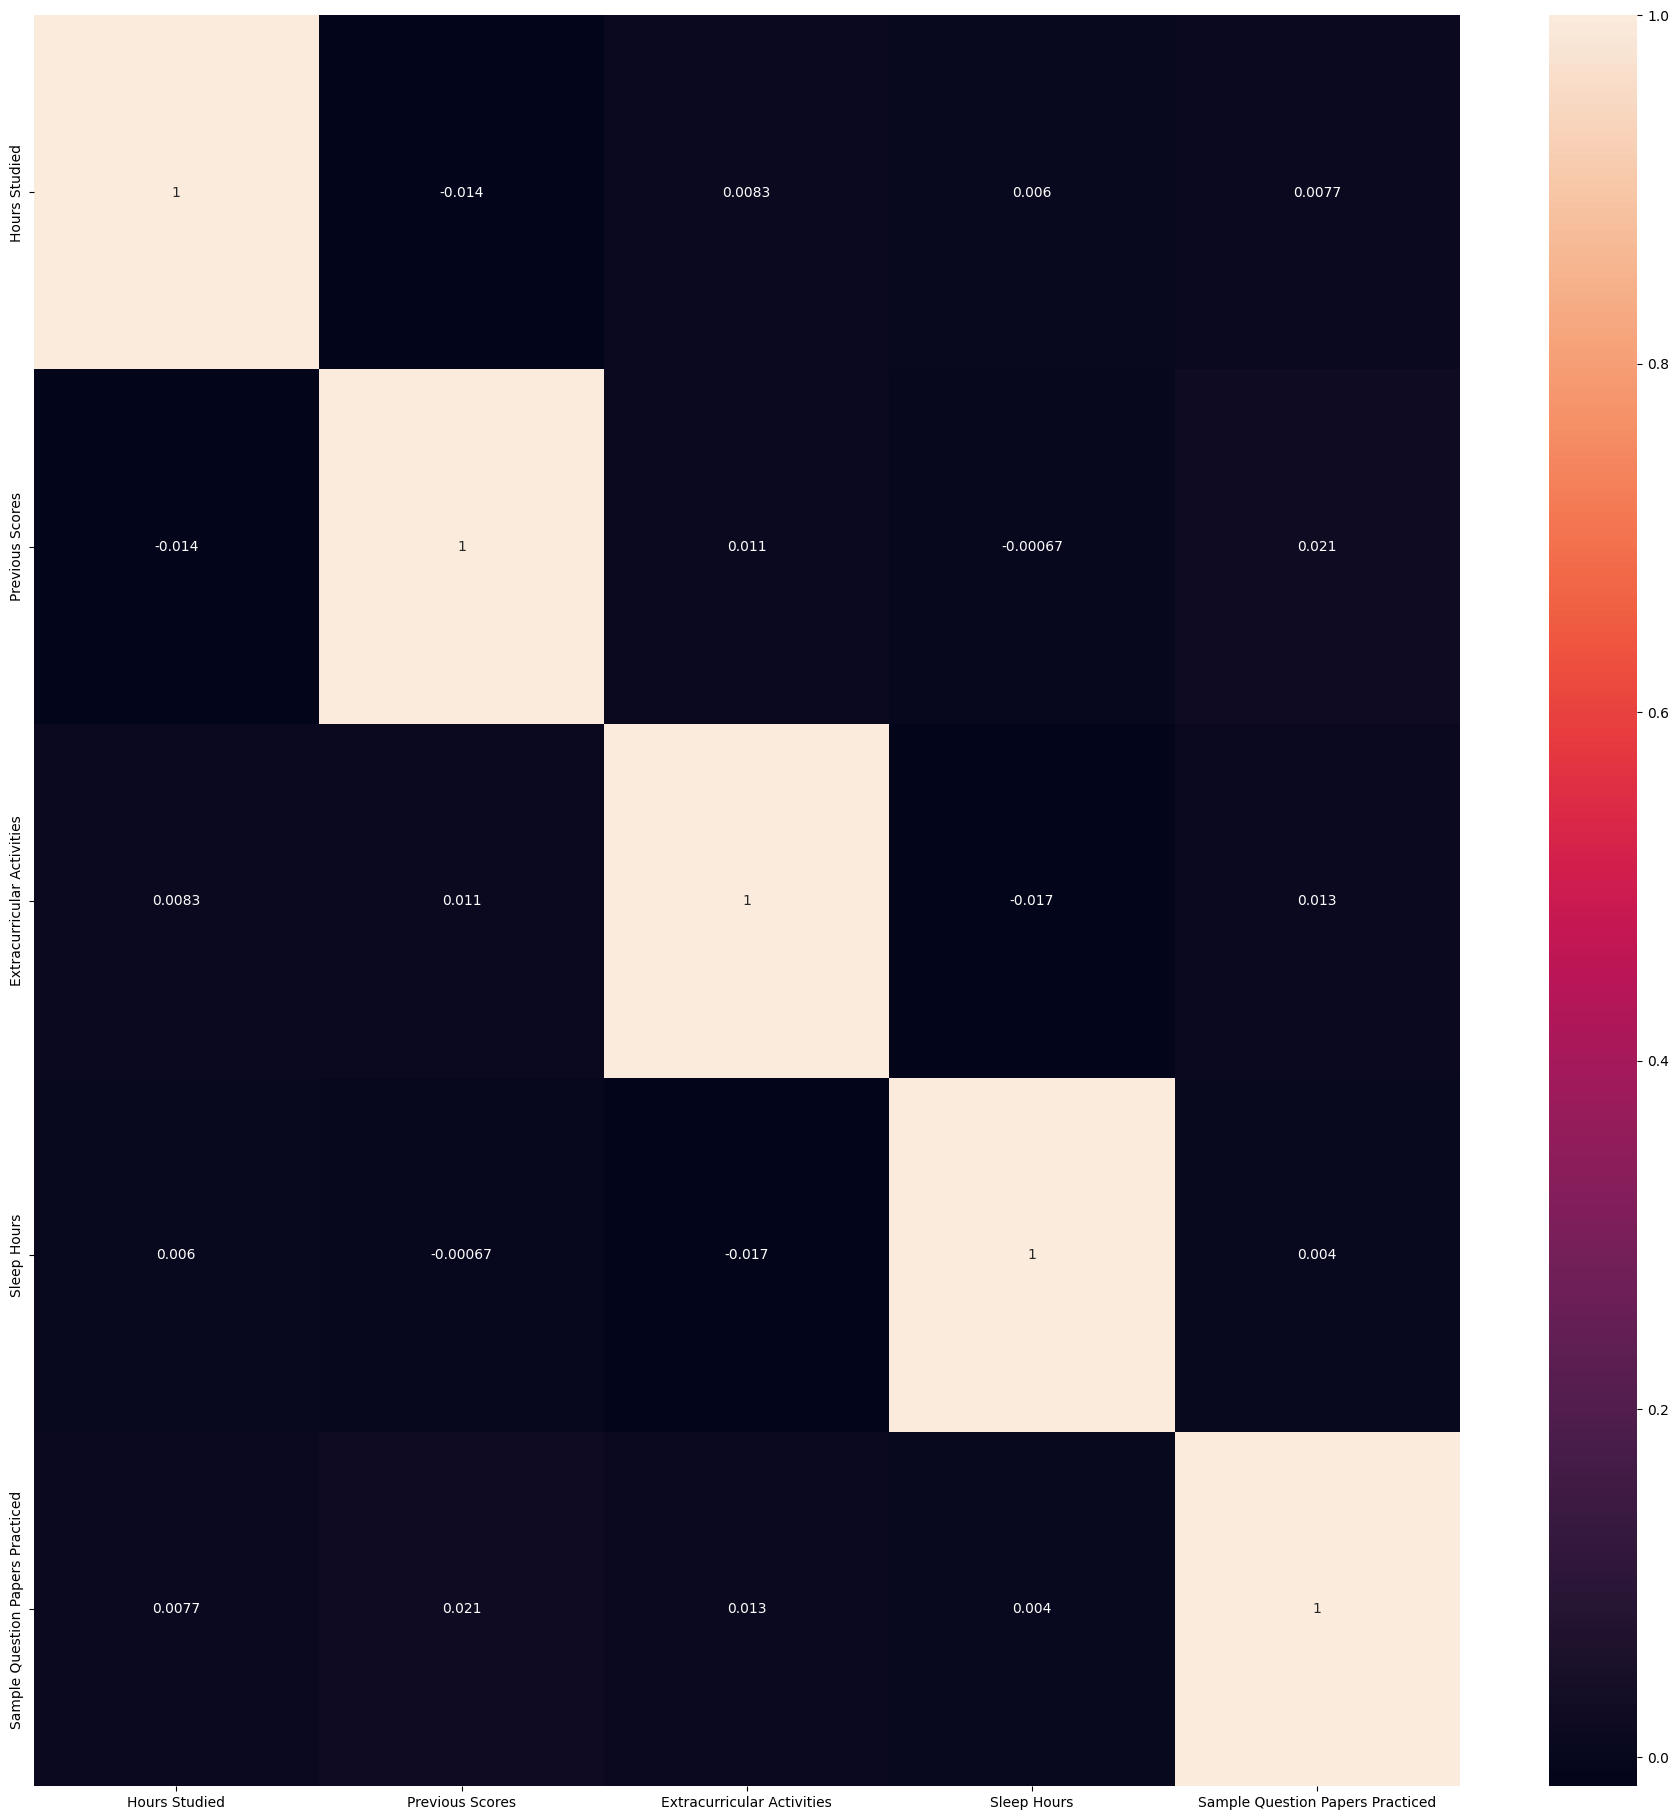

In [630]:
#Heat map after feature selection
plt.figure(figsize = (23,23))
sns.heatmap(x_train.corr(),annot = True)

In [631]:
# Calculate Pearson correlation coefficients between features and target
correlation_coefficients = np.abs(np.corrcoef(x_train.T, y_train)[:-1, -1])

# Sort the features based on correlation coefficients
sorted_indices = np.argsort(correlation_coefficients)[::-1]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize variables to store the best feature subset and its corresponding performance metric
best_subset = None
best_score = -float('inf')  # Initialize with negative infinity for maximization

# Loop over different numbers of features
for k in range(1, x_train.shape[1] + 1):
    # Select the top k features with highest correlation coefficients
    selected_indices = sorted_indices[:k]
    x_train_selected = x_train.iloc[:, selected_indices]
    x_test_selected = x_test.iloc[:, selected_indices]

    # Train a linear regression model using the selected features
    linear_model = LinearRegression()
    linear_model.fit(x_train_selected, y_train)

    # Predict on the test set
    y_predict = linear_model.predict(x_test_selected)

    # Calculate R2 score
    r2 = r2_score(y_test, y_predict)

    # Calculate adjusted R2 score
    n_samples = len(y_test)
    r2adjusted = 1 - (1 - r2) * (n_samples - 1) / (n_samples - k - 1)

    # Check if the current subset improves the best score
    if r2adjusted > best_score:
        best_subset = selected_indices
        best_score = r2adjusted

# Print the best feature subset and its corresponding score
print("Best Feature Subset:", best_subset)


Best Feature Subset: [1 0 4 3 2]


In [632]:
# Train the linear regression model on the training data
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Predict on the test set
y_predict = linear_model.predict(x_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2adjusted = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)


# Print the results
print(f"The R2 score is {r2}\nThe Mean Squared Error is {mse}\nThe adjusted R2 score is {r2adjusted}")


The R2 score is 0.9888394301844007
The Mean Squared Error is 4.253552150614053
The adjusted R2 score is 0.9888110894789268
